In [13]:
from main import *
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

In [5]:
lines = []
with open('../input/carnd/driving_log.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)

#images = []
train_samples = []
train_measurements = []
train_marks = []
lines_count = len(lines)
train_lines_count = int(lines_count*0.8)
validation_lines_count = lines_count - train_lines_count
for line in lines[:train_lines_count]:
    # 0 center image, 1 left image, 2 right image, 3 measurement
    measurement = float(line[3])
    for i in range(3):
        current_path = line[i]
        #image = cv2.imread(current_path)
        #images.append(image)
        train_samples.append(current_path)
        factor = 0.0
        if i == 1:
            factor = 0.2
        if i == 2:
            factor = -0.2
        train_measurements.append(measurement + factor)
        train_marks.append(0)
# data augmentation
for i in range(train_lines_count):
    train_samples.append(train_samples[i])
    train_measurements.append(train_measurements[i])
    train_marks.append(1) # 1 for horizontal flipping


validation_samples = []
validation_measurements = []
validation_marks = []
for line in lines[train_lines_count:lines_count]:
    # 0 center image, 1 left image, 2 right image, 3 measurement
    measurement = float(line[3])
    current_path = line[0]
    validation_samples.append(current_path)
    validation_measurements.append(measurement)
    validation_marks.append(0)

#train_samples, validation_samples = train_test_split(samples, test_size=0.2)
#train_measurements, validation_measurements = train_test_split(measurements, test_size=0.2)


# data augmentation
#augmented_images, augmented_measurements = [], []
#for image, measurement in zip(images, measurements):
#    augmented_images.append(image)
#    augmented_measurements.append(measurement)
#    augmented_images.append(cv2.flip(image, 1))
#    augmented_measurements.append(measurement*-1.0)

#X_train = np.array(augmented_images)
#y_train = np.array(augmented_measurements)

#print(len(X_train), len(y_train))







train_generator = generator(train_samples, train_measurements, train_marks)
validation_generator = generator(validation_samples, validation_measurements, validation_marks)


#X_train = preprocess_input(X_train)
model = car_net()
model.summary()

steps_per_epoch = len(train_samples) / 3
validation_steps = len(validation_samples) / 3

model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
h = model.fit_generator(train_generator,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=validation_generator,
                    validation_steps=validation_steps,
                    nb_epoch=3)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_2 (Lambda)            (None, 160, 320, 3)       0         
_________________________________________________________________
cropping2d_2 (Cropping2D)    (None, 65, 320, 3)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 31, 158, 24)       1824      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 14, 77, 36)        21636     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 5, 37, 48)         43248     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 35, 64)         27712     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 1, 33, 64)         36928     
__________

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:86: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:86: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<generator..., validation_data=<generator..., validation_steps=256.0, steps_per_epoch=4090.66666..., epochs=3)`


Epoch 1/3
4091/4090 [==============================] - 121s 30ms/step - loss: 0.0196 - acc: 0.2467 - val_loss: 0.0313 - val_acc: 0.5972
Epoch 2/3
4091/4090 [==============================] - 114s 28ms/step - loss: 0.0122 - acc: 0.2472 - val_loss: 0.0349 - val_acc: 0.5944
Epoch 3/3
4091/4090 [==============================] - 113s 28ms/step - loss: 0.0099 - acc: 0.2476 - val_loss: 0.0365 - val_acc: 0.5969


In [8]:
print('Train Images:', len(train_samples))
print('Validation Images:', len(validation_samples))

Train Images: 12272
Validation Images: 768


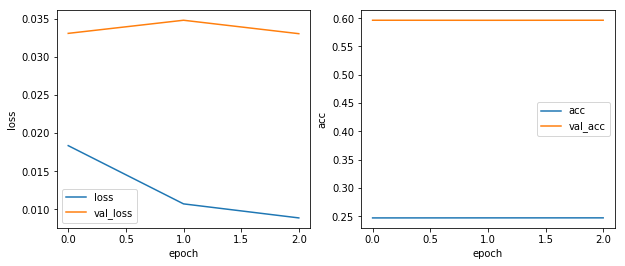

In [3]:
plot_loss_and_accuracy(h.history)

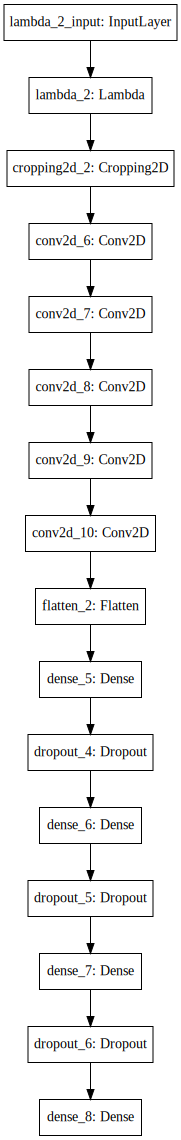

In [11]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [14]:
HTML("""
<video width="320" height="160" controls>
  <source src="run1.mp4">
</video>
""")

In [4]:
model.save('model.h5')